# Hyperspy Tutorial

## Processing of 3D EDS/SEM map

###### Requirement

Hyperspy 0.8.1

###### Notebook

Notebook used for the Hyperspy training at IMC 2014, Prague 7 September 2014.

###### Data

The sample and the data used in this tutorial are described in 
P. Burdet, et al., Acta Materialia, 61, p. 3090-3098 (2013) (see the [abstract](http://infoscience.epfl.ch/record/185861/>)).

In [1]:
#Download the data (130MB)
from urllib import urlretrieve
filename= ['TiFeNi_0'+str(i)+'.rpl' for i in range(10,15)] + \
          ['TiFeNi_0'+str(i)+'.raw' for i in range(10,15)] + \
          ['image0'+str(i)+'.tif' for i in range(10,15)] + ['1pix.msa']    
files = [urlretrieve('http://cook.msm.cam.ac.uk//~hyperspy//EDS_tutorial//' + fname, fname) for fname in filename]

The data were acquired during a 3D EDS/SEM experiment. The data are exported from INCA software (Oxford instrument). The ".msa" file contains a single spectrum and the metadata to calibrate it. The ".rpl" is a header to read the ".raw". Each ".raw" file contains an EDS/SEM spectral image, acquired at different milled thicknesses (depth or z axis) with a FIB/SEM (Nvision40 Zeiss). The ".tiff" files contains the corresponding SE images.

###### Sample

<img src="images/TiFeNi.png" style="height:450px;">
Figure 1: Laser welding of NiTi and stainless steel wires. (a) gives details of the geomtry. (b) SEM back-scattered image of a longitudinal cut through a welded NiTi–SS couple. (c) Surface reconstruction of the seven regions identified by combined FIB, EDS and SE. (d) Ternary histogram of the Ti, Ni and Fe compositions from 3-D stack superimposed on the projection of the 1000°C isothermal section of the Fe–Ni–Ti phase diagram.

###### Author

Pierre Burdet

###### <a id='top'></a> Table of contents

1. <a href='#2d'> 2D Spectrum Image</a>
2. <a href='#visu'> Visualisation</a>
3. <a href='#pca'> Machine learning</a>
4. <a href='#3d'> 3D Spectrum image</a>


Import HyperSpy using its IPython magic (**new in HyperSpy 0.8.1**)

In [ ]:
# %hyperspy -r qt4
import numpy as np
import hyperspy.api as hs
from hyperspy.hspy import *
%matplotlib qt4
import matplotlib.pyplot as plt



###### For a nice on-line display

In [5]:
#Set figure inline
%matplotlib inline

## <a id='2d'></a> 1. 2D Spectrum Image

<a href='#top'> Table of contents</a>

### 1.1. loading

In [6]:
specImg = hs.load("TiFeNi_010.rpl")

Loading as Image


In [7]:
specImg

<Image, title: , dimensions: (1024|128, 96)>

Define as a spectrum image

In [8]:
specImg = specImg.as_spectrum(0)

Set the signal type

In [9]:
specImg.set_signal_type('EDS_SEM')

### 1.2. Calibration

In [10]:
specImg.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 0.0
│       │       ├── elevation_angle = 35.0
│       │       └── energy_resolution_MnKa = 130.0
│       └── tilt_stage = 0.0
├── General
│   ├── original_filename = TiFeNi_010.rpl
│   └── title = 
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = 
    └── signal_type = EDS_SEM

In [11]:
specImg.axes_manager.gui()

Calibrate the energy axis and the microscope parameters using the calibration of a single pixel spectrum

In [12]:
spec = hs.load('1pix.msa')
spec.set_signal_type('EDS_SEM')

/home/fjd29/Python/hyperspy/hyperspy/io_plugins/msa.py:226: UserWarning: I couldn't write the date information due toan unexpected error. Please report this error to the developers
  warnings.warn("I couldn't write the date information due to"


In [13]:
spec.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 90.0
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       ├── live_time = 0.012
│       │       └── real_time = 0.0
│       ├── beam_current = 0.0
│       ├── beam_energy = 10.0
│       └── tilt_stage = -36.0
├── General
│   ├── original_filename = 1pix.msa
│   └── title = u''
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = 
    └── signal_type = EDS_SEM

In [14]:
specImg.get_calibration_from(spec)

Calibrate the spatial axes

In [15]:
specImg.axes_manager.navigation_axes[0].name = 'x'
specImg.axes_manager.navigation_axes[1].name = 'y'

In [16]:
units_name = '${\mu}m$'
specImg.axes_manager['x'].units = units_name
specImg.axes_manager['y'].units = units_name

In [17]:
specImg.axes_manager['x'].scale = 0.10
specImg.axes_manager['y'].scale = 0.10

## <a id='visu'></a> 2. Visualisation

<a href='#top'> Table of contents</a>

### 2.1. Customising the navigator

/home/fjd29/Anaconda/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1057: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if aspect == 'normal':
/home/fjd29/Anaconda/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_base.py:1062: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif aspect in ('equal', 'auto'):


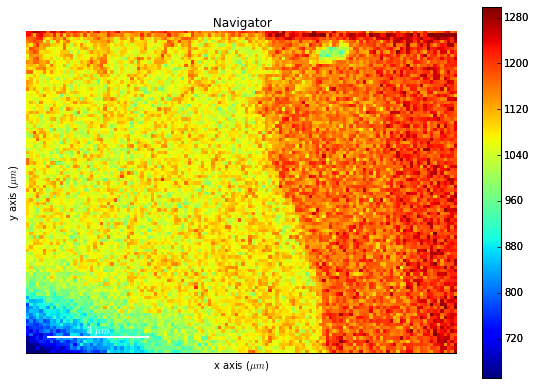

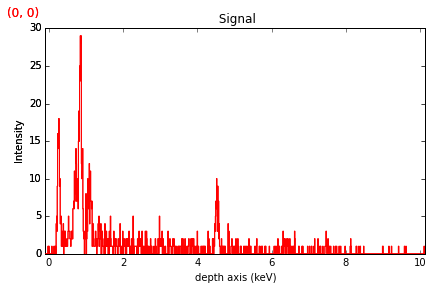

In [18]:
specImg.plot()

Use the SE image associated with the EDS map as navigator

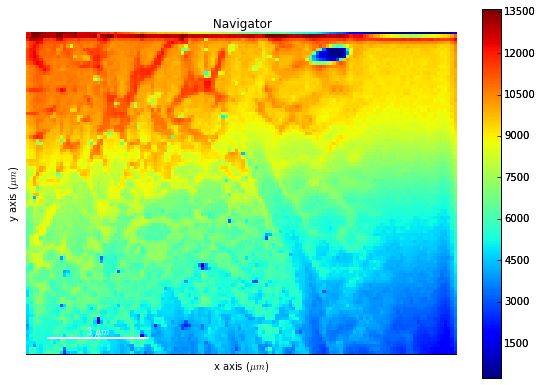

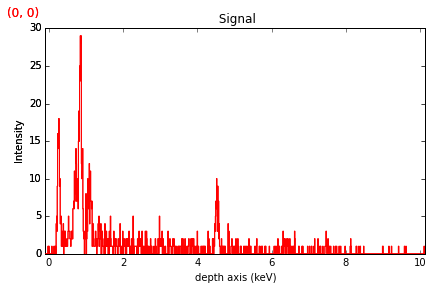

In [19]:
img = hs.load("image010.tif")
dim = specImg.axes_manager.shape
imgBin = img.rebin((dim[0],dim[1]))
specImg.plot(navigator=imgBin)

Plot as an image stack

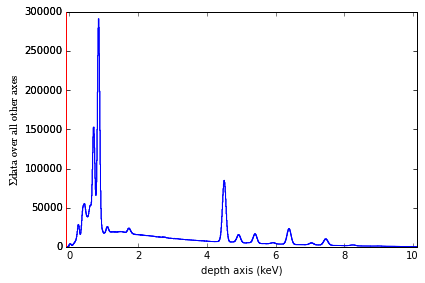

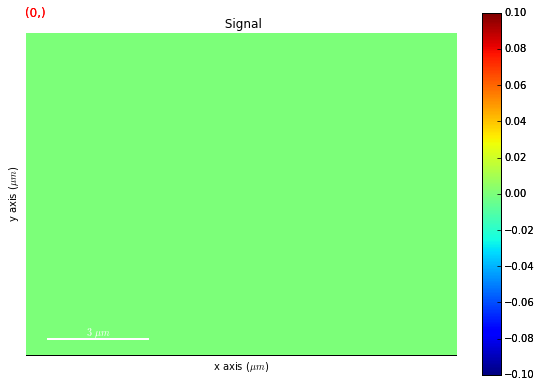

In [20]:
imgSpec = specImg.as_image([0,1])
imgSpec.plot()

Use the max spectrum as navigator

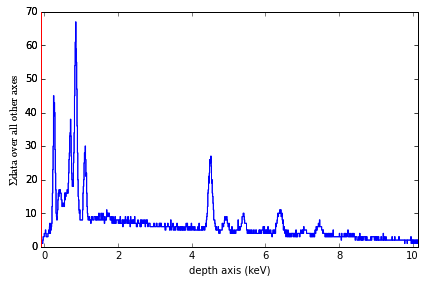

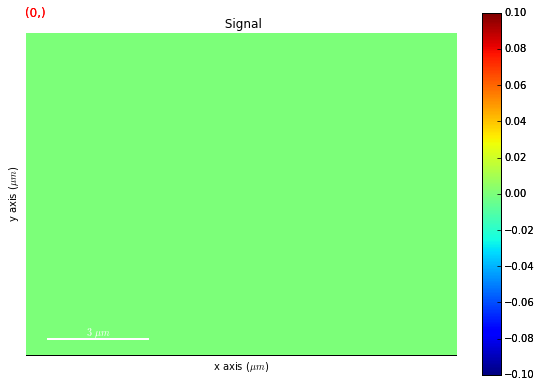

In [21]:
specmax = specImg.max(0).max(0)
imgSpec.plot(navigator=specmax)

Peak labelling will come in hyperspy 0.8

### 2.2. X-ray intensity maps

Define the elements and the X-ray lines

In [22]:
specImg.set_elements(('Ni','Ti','Fe'))
specImg.add_lines()

Fe_La line added,
Ni_La line added,
Ti_Ka line added,


In [23]:
specImg.metadata

├── Acquisition_instrument
│   └── SEM
│       ├── Detector
│       │   └── EDS
│       │       ├── azimuth_angle = 90.0
│       │       ├── elevation_angle = 35.0
│       │       ├── energy_resolution_MnKa = 130.0
│       │       ├── live_time = 0.012
│       │       └── real_time = 0.0
│       ├── beam_current = 0.0
│       ├── beam_energy = 10.0
│       └── tilt_stage = -36.0
├── General
│   ├── original_filename = TiFeNi_010.rpl
│   └── title = 
├── Sample
│   ├── elements = ['Fe', 'Ni', 'Ti']
│   └── xray_lines = ['Fe_La', 'Ni_La', 'Ti_Ka']
└── Signal
    ├── binned = True
    ├── record_by = spectrum
    ├── signal_origin = 
    └── signal_type = EDS_SEM

[<Image, title: X-ray line intensity of : Fe_La at 0.70 keV, dimensions: (|128, 96)>,
 <Image, title: X-ray line intensity of : Ni_La at 0.85 keV, dimensions: (|128, 96)>,
 <Image, title: X-ray line intensity of : Ti_Ka at 4.51 keV, dimensions: (|128, 96)>]

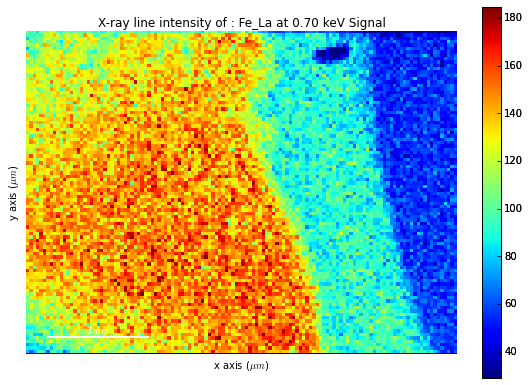

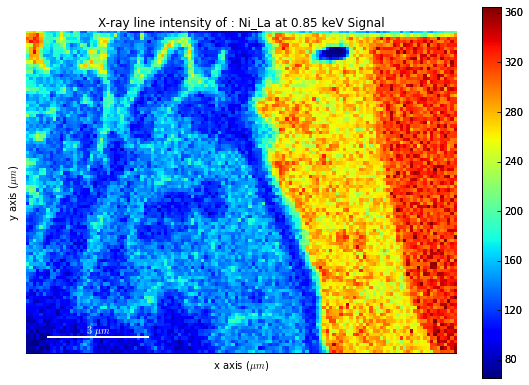

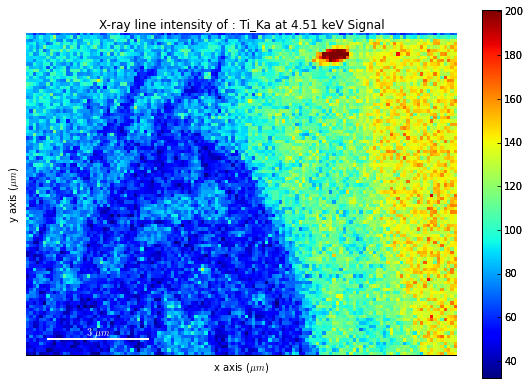

In [24]:
specImg.get_lines_intensity(plot_result=True)

The method integrates to obtain the number of X-ray counts below each X-ray peak and return the intensity maps. 

Be carefull: qualitative information, no background substraction, no overalpping-lines deconvolution.

Peak fitting, background removal and quantification are in development.

## <a id='pca'></a> 3. Machine learning

<a href='#top'> Table of contents</a>

Change the data type to float32

In [25]:
specImg.data.dtype

dtype('<i2')

In [26]:
specImg.change_dtype('float32')

### 3.1. PCA

In [27]:
specImg.decomposition(True)


Scaling the data to normalize the (presumably) Poissonian noise

Performing decomposition analysis
Undoing data pre-treatments


Explore the components

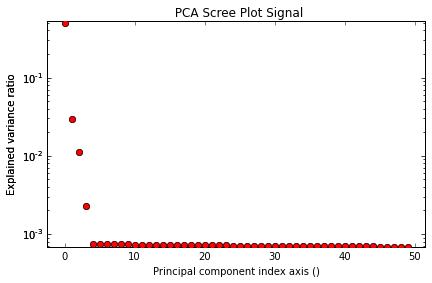

In [28]:
specImg.plot_explained_variance_ratio()

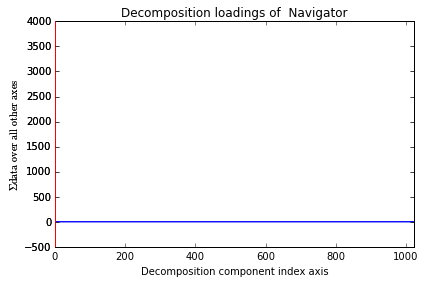

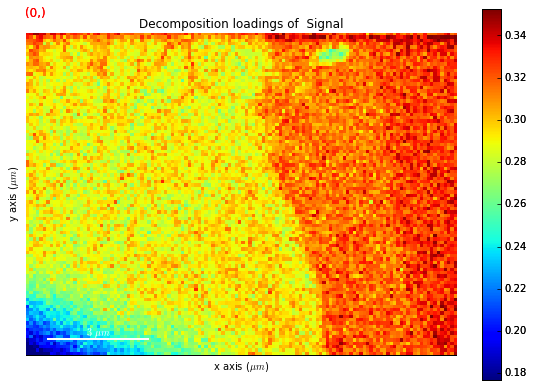

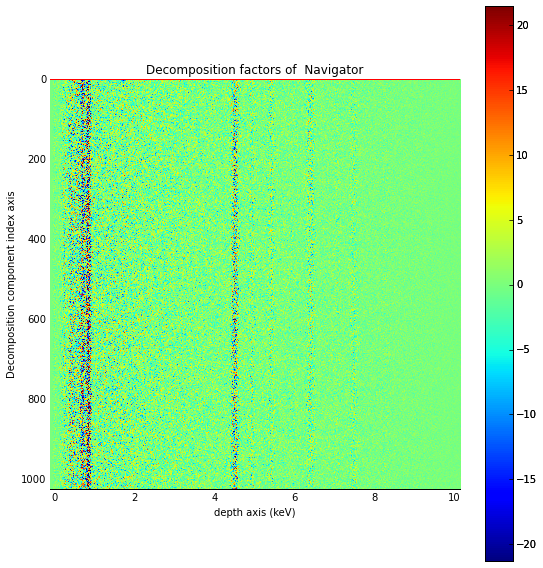

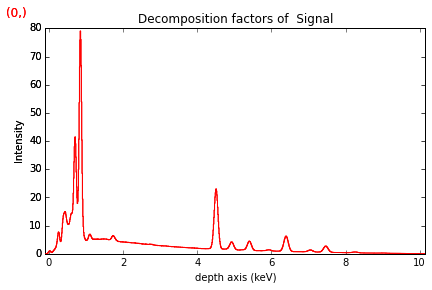

In [29]:
specImg.plot_decomposition_results()

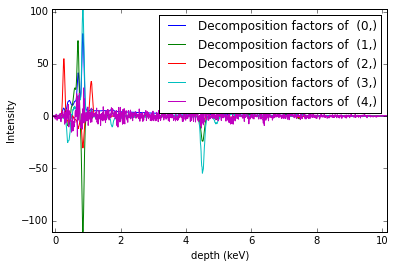

In [30]:
hs.plot.plot_spectra(specImg.get_decomposition_factors()[:5],legend='auto')

### 3.2. Blind source separation

Applies ICA (blind source separation) on the first five component

In [31]:
specImg.blind_source_separation(5)

IC 1 reversed


Explore the "source"

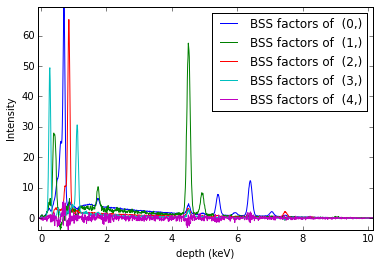

In [32]:
hs.plot.plot_spectra(specImg.get_bss_factors(),legend='auto')

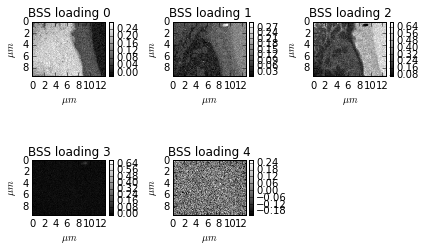

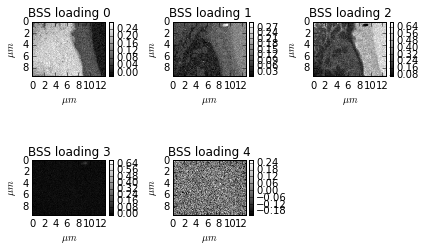

In [33]:
specImg.plot_bss_loadings(range(5))

### 3.4. Data denoising

Removing the noise by constructing a model of selected components

In [34]:
specImgPCA = specImg.get_decomposition_model(5)

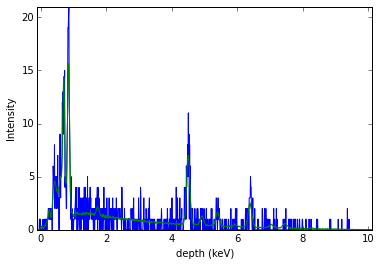

In [35]:
hs.plot.plot_spectra([specImg[10,10],specImgPCA[10,10]])

Compare the intensity maps before and after denoising

[[<Image, title: X-ray line intensity of : Fe_Ka at 6.40 keV, dimensions: (|128, 96)>],
 [<Image, title: X-ray line intensity of model from decomposition with 5 components: Fe_Ka at 6.40 keV, dimensions: (|128, 96)>]]

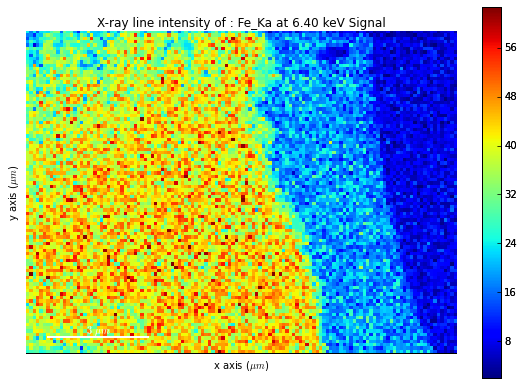

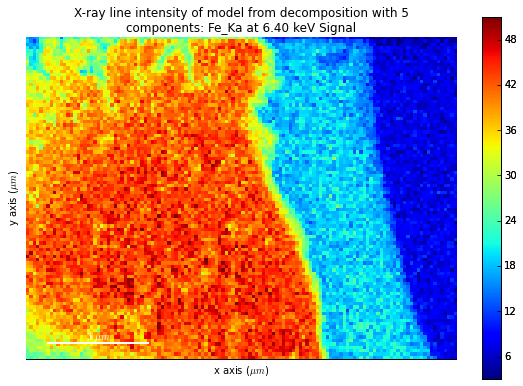

In [36]:
[s.get_lines_intensity(['Fe_Ka'],plot_result=True) for s in [specImg, specImgPCA]]

## <a id='3d'></a> 4. 3D Spectrum image

<a href='#top'> Table of contents</a>

Load the 3D data

In [38]:
axes_name = ['x','y','z']
units_name = '${\mu}m$'
EDS_scale = np.array([0.10,0.10,0.10])
specImg3D = hs.load("TiFeNi_0*.rpl",stack = True).as_spectrum(0)
specImg3D.set_signal_type('EDS_SEM')
specImg3D.get_calibration_from(spec)
specImg3D.metadata.General.title = '3D EDS map'
for i in range(3):
    specImg3D.axes_manager.navigation_axes[i].name = axes_name[i]
    specImg3D.axes_manager.navigation_axes[i].units = units_name
    specImg3D.axes_manager.navigation_axes[i].scale = EDS_scale[i]


Loading individual files
Loading as Image
Loading as Image
Loading as Image
Loading as Image
Loading as Image

Individual files loaded correctly

	Title: EDS
	Signal type: 
	Data dimensions: (1024, 5, 128, 96)
	Data representation: image
	Data type: int16


Load the stack of SE images

In [40]:
SEM_EDS_factor = np.array([8,8,1])
#Load the SE images
img3D = hs.load("image*.tif",stack = True)
specImg3D.metadata.General.title = 'SE images'
for i in range(2):
    img3D.axes_manager.signal_axes[i].name = axes_name[i]
    img3D.axes_manager.signal_axes[i].units = units_name
    img3D.axes_manager.signal_axes[i].scale = EDS_scale[i] / SEM_EDS_factor[i]


Loading individual files

Individual files loaded correctly

	Title: EDS
	Signal type: 
	Data dimensions: (5, 1024, 768)
	Data representation: image
	Data type: uint8


### 4.1. Visualisation

Plot the 3D EDS data with SE images as navigator

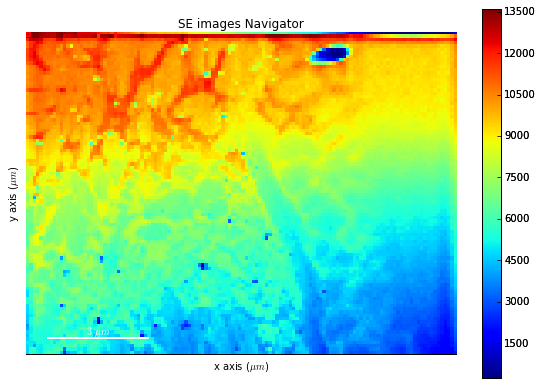

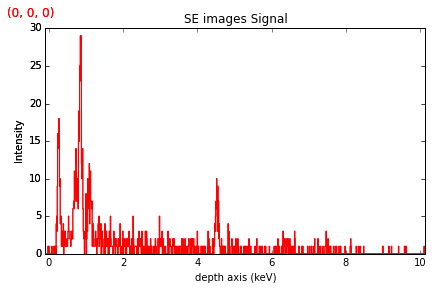

In [41]:
dim = specImg3D.axes_manager.shape
img3DBin = img3D.rebin((dim[2],dim[0],dim[1]))
specImg3D.plot(navigator=img3DBin)

3D Ti Ka intensity map

[<Image, title: X-ray line intensity of SE images: Ti_Ka at 4.51 keV, dimensions: (5|128, 96)>]

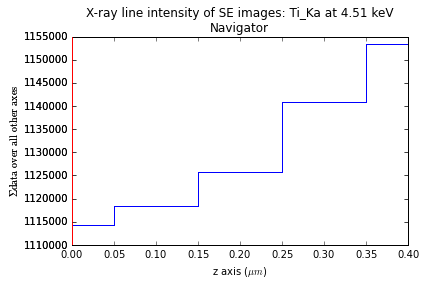

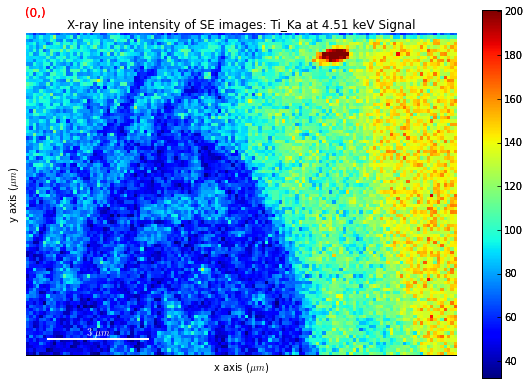

In [42]:
specImg3D.get_lines_intensity(['Ti_Ka'],plot_result=True)

Plot an iso-sufaces rendering of the Ni La intensity map using mayavi package

In [47]:
#Import packages
from skimage import filter
from mayavi import mlab
#Generate the X-ray intensity map of Nickel L alpha
NiMap = specImg3D.get_lines_intensity(['Ni_La'])[0]
#Reduce the noise
NiMapDenoise = filter.denoise_tv_bregman(NiMap.data.astype("float"),2)
#Plot isosurfaces
mlab.contour3d(NiMapDenoise)
mlab.outline()

/home/fjd29/Anaconda/anaconda2/lib/python2.7/site-packages/skimage/restoration/_denoise.py:62: skimage_deprecation: Call to deprecated function ``denoise_tv_bregman``. Use ``skimage.restoration.denoise_tv_bregman`` instead.
  """Perform total-variation denoising using split-Bregman optimization.


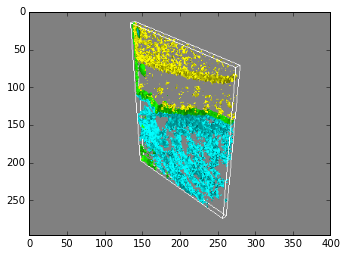

In [48]:
#Take a screenshot to display in the notebook
plt.imshow(mlab.screenshot()[1:])